In [1]:
from huggingface_hub import login
from diffusers import DiffusionPipeline
import torch

# first we need to login with our access token
login()

# Now we can download the pipeline
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)

In [2]:
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.17.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [3]:
pipeline.scheduler

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.17.0.dev0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "trained_betas": null
}

In [4]:
prompt = "A photograph of an astronaut riding a horse on Mars, high resolution, high definition."

  0%|          | 0/50 [00:00<?, ?it/s]

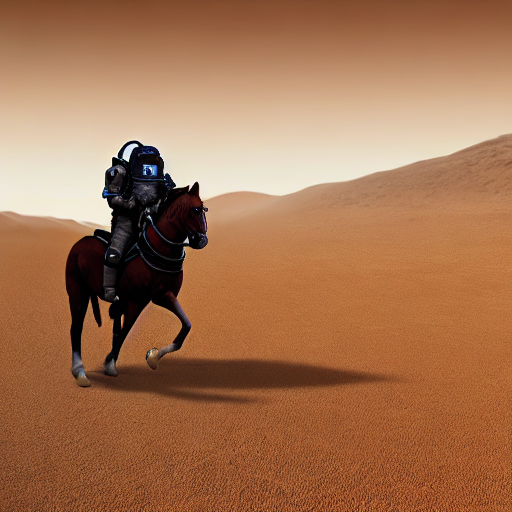

In [5]:
generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator).images[0]
image

In [6]:
pipeline.scheduler.compatibles

[diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.utils.dummy_torch_and_torchsde_objects.DPMSolverSDEScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscret

In [7]:
pipeline.scheduler.config

FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.00085),
            ('beta_end', 0.012),
            ('beta_schedule', 'scaled_linear'),
            ('trained_betas', None),
            ('skip_prk_steps', True),
            ('set_alpha_to_one', False),
            ('prediction_type', 'epsilon'),
            ('steps_offset', 1),
            ('_class_name', 'PNDMScheduler'),
            ('_diffusers_version', '0.17.0.dev0'),
            ('clip_sample', False)])

In [8]:
from diffusers import DDIMScheduler

pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)

  0%|          | 0/50 [00:00<?, ?it/s]

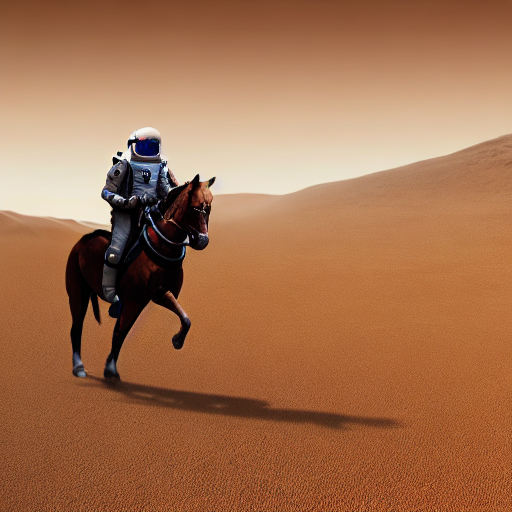

In [9]:
generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

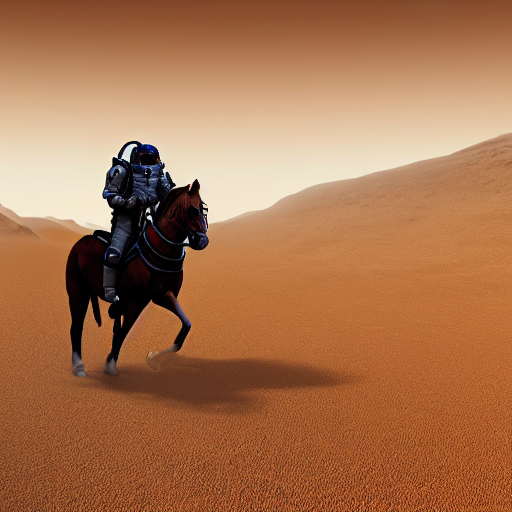

In [10]:
from diffusers import LMSDiscreteScheduler

pipeline.scheduler = LMSDiscreteScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

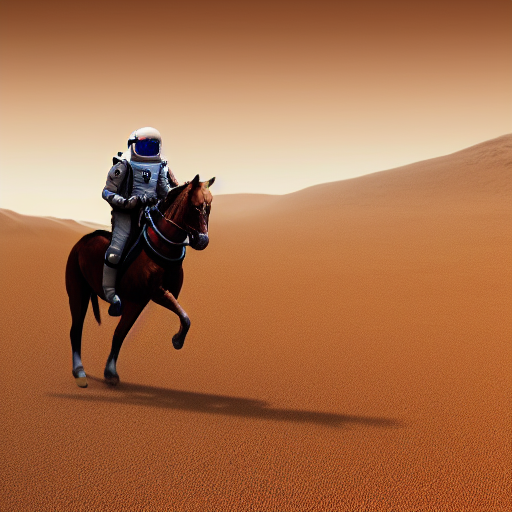

In [11]:
from diffusers import EulerDiscreteScheduler

pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator, num_inference_steps=30).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

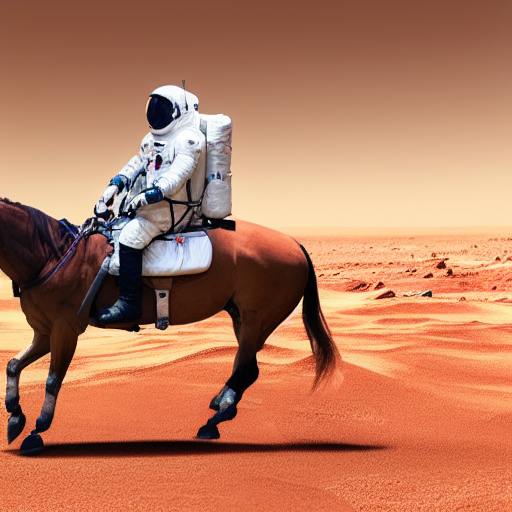

In [12]:
from diffusers import EulerAncestralDiscreteScheduler

pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator, num_inference_steps=30).images[0]
image

  0%|          | 0/20 [00:00<?, ?it/s]

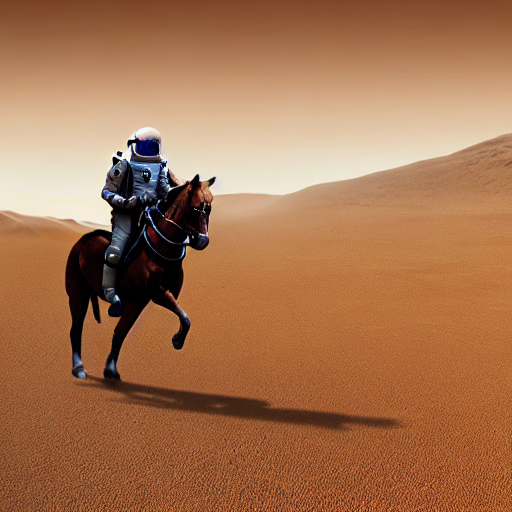

In [13]:
from diffusers import DPMSolverMultistepScheduler

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator, num_inference_steps=20).images[0]
image